In [23]:
# Standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
path = '/home/nyangweso/Desktop/Ds_1/ML-Zoomcamp/02-Regression'

In [3]:
df = pd.read_csv(f'{path}/car_price_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [29]:
df.shape

(11914, 16)

#### Data Preparation & EDA

Rename the columns to ensure consistency in column name

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

Rename the values in columns with string dtype to ensure consistency in string values

In [21]:
str_cols = list(df.dtypes[df.dtypes == 'object'].index)
str_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [22]:
for col in str_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### Moving now to EDA

In [28]:
for col in df.columns:
    print(df[col].unique()[:5])
    print(f"No. of unique values in the column '{col}' = {df[col].nunique()}")
    print()

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
No. of unique values in the column 'make' = 48

['1_series_m' '1_series' '100' '124_spider' '190-class']
No. of unique values in the column 'model' = 914

[2011 2012 2013 1992 1993]
No. of unique values in the column 'year' = 28

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
No. of unique values in the column 'engine_fuel_type' = 10

[335. 300. 230. 320. 172.]
No. of unique values in the column 'engine_hp' = 356

[ 6.  4.  5.  8. 12.]
No. of unique values in the column 'engine_cylinders' = 9

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
No. of unique values in the column 'transmission_type' = 5

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
No. of unique values in the column 'driven_wheels' = 4

[ 2.  4.  3. nan]
No. of unique values in the column 'number_of_doors' = 3

['factory_tuner,luxury,high-performance'

In [30]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Taking a look at the distribution of the price i.e 'msrp' column

/home/nyangweso/miniconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/home/nyangweso/miniconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


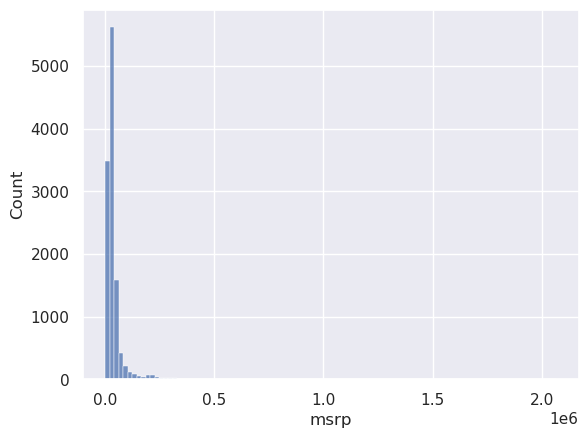

In [44]:
sns.histplot(df['msrp'], bins=100)
plt.show()

The above distribution is called a 'long tail distribution' i.e most values are at one end.\
This kind of distribution is common especially in car prices

We can have a closer look at the range where most car are priced

/home/nyangweso/miniconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nyangweso/miniconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


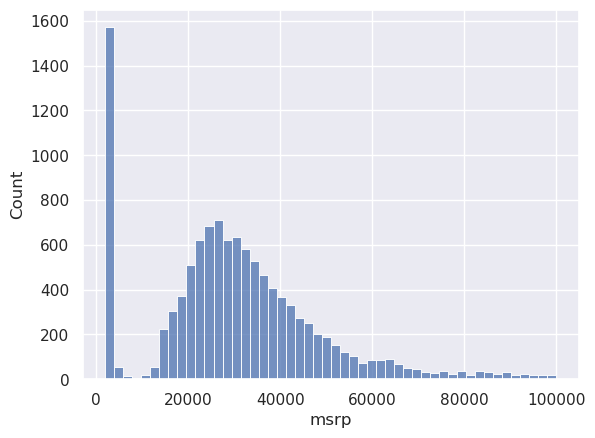

In [46]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins=50)
plt.show()

##### Scaling the 'msrp' column
Let's get the logarithmic values for the price as a means of scaling the data.\
We will use np.log1p() instead of np.log() to avoid the 'log of zero' error just in case it appears

In [47]:
price_logs = np.log1p(df['msrp'])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

Plotting our logarithmic values

/home/nyangweso/miniconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nyangweso/miniconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

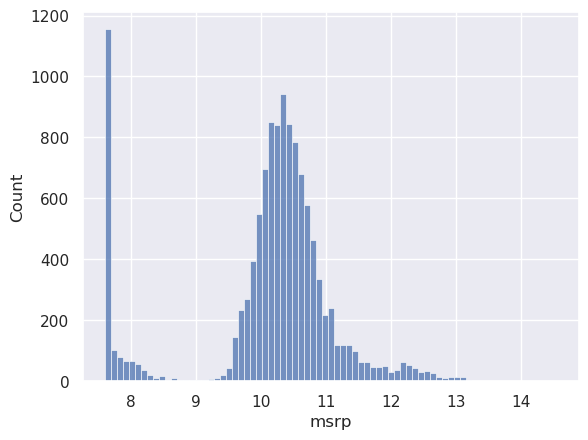

In [51]:
sns.histplot(price_logs, bins=75)

The above distribution is considered a normal distribution since the peak is at the centre\
This distribution is ideal for models i.e models tend to perform much better with normal distributions as compared to long tail distributions

#### Setting up the validation framework

In [55]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)
n, (n_val, n_test, n_train)

(11914, (2382, 2382, 7150))

Let's 1st shuffle the dataset

In [60]:
idx = np.arange(n)

In [98]:
np.random.seed(0)
np.random.shuffle(idx)
idx

array([ 1971,  4625,  5924, ..., 11418,  6379,  3718])

In [90]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [81]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10295,ford,taurus,2016,flex-fuel_(unleaded/e85),288.0,6.0,automatic,all_wheel_drive,4.0,"flex_fuel,performance",large,sedan,24,17,5657,36310
6626,porsche,macan,2015,premium_unleaded_(required),400.0,6.0,automated_manual,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,23,17,1715,72300
9525,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,22,16,1385,50850
2448,dodge,challenger,2015,regular_unleaded,375.0,8.0,manual,rear_wheel_drive,2.0,performance,large,coupe,23,15,1851,35795
10068,pontiac,sunbird,1993,regular_unleaded,110.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,convertible,32,22,210,2000


In [99]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

Creating the feature matix X and the output variable y

In [100]:
y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

In [101]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Model Training using Linear Regression

In [103]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,subaru,baja,2006,premium_unleaded_(required),210.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,crew_cab_pickup,21,16,640
1,volkswagen,beetle_convertible,2014,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,27,21,873
2,pontiac,trans_sport,1998,regular_unleaded,180.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,23,16,210
3,volkswagen,cc,2015,premium_unleaded_(recommended),200.0,4.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,32,21,873
4,mazda,b-series_pickup,2000,flex-fuel_(unleaded/e85),143.0,6.0,manual,four_wheel_drive,2.0,flex_fuel,compact,regular_cab_pickup,20,15,586


1st, We will create a LR from scratch

In [107]:
w0 = 0  # base term
w = [1, 1, 1]  # weights

In [110]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    return res

# linear_regression(xi)

In [112]:
w_new = [w0] + w

In [114]:
def linear_regression(xi):
    xi = [1] + xi  # consider [1] a fictional feature
    return dot(xi, w_new)